<a href="https://colab.research.google.com/github/sipocz/Colab/blob/main/timeseries_prediction_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BTC

A BTC befektetéseink szempontjából fontos a jó időzítés.... 

Bővebb információ magáról a jelenségről [itt](https://en.wikipedia.org/wiki/Sunspot#Application) található.

## Elsődleges adatforrás



## Havi modellezés

### Feladat 1:

Töltse le, majd be a havi adatsort! 

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd


Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/My Drive/001_AI/06_AI/BTC-USD-ALL.csv",header=0, sep=",")
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2308,2021-01-11,38346.531250,38346.531250,30549.599609,35566.656250,35566.656250,123320567398
2309,2021-01-12,35516.359375,36568.527344,32697.976563,33922.960938,33922.960938,74773277909
2310,2021-01-13,33915.121094,37599.960938,32584.667969,37316.359375,37316.359375,69364315979
2311,2021-01-14,37325.109375,39966.406250,36868.562500,39187.328125,39187.328125,63615990033
2312,2021-01-15,37838.644531,39551.417969,34864.175781,35364.203125,35364.203125,67232067584


### Feladat 2:

Végezzen "exploratív" elemzést az adatokon, leírók és grafikonok segítségével mutassa be főbb jellemzőit!

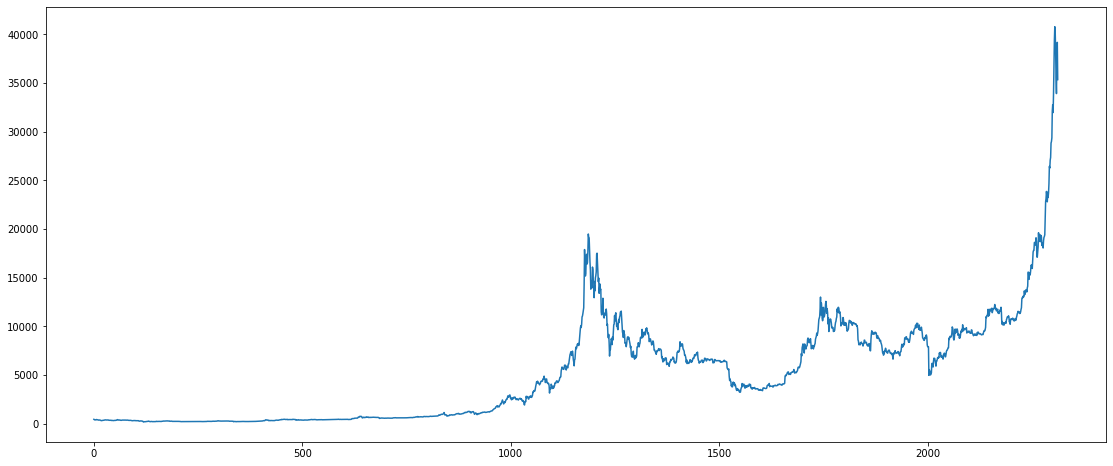

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(19, 8))

plot = df["Close"].plot()
plt.show()

Trend vagy Stacionárius folyamat?
"... a stacionárius folyamat (más néven szigorúan vagy erősen helyhez kötött folyamat) egy sztochasztikus folyamat, amelynek feltétel nélküli közös valószínűség-eloszlása nem változik, az időben haladva. Következésképpen az olyan paraméterek, mint az átlag és szórás idővel nem változnak."

Általában a Dickey-Fuller teszt azt a célt szolgálja, hogy megállapítsa egy folyamat stacionárius jellegét. Ha a  p  valószínűségértéke az 5% -os bizalmi érték alatt van, hajlamosak vagyunk elfogadni a folyamatot stacionáriusnak. Itt, ebben az esetben - anélkül, hogy túl nagy meglepetést okozna - arra következtethetünk, hogy a folyamat nem stacionárius.

In [6]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df["Close"].values)

print('p-value: %f' % result[1])

print("0.05 alatt kellene lennie")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


p-value: 0.997657
0.05 alatt kellene lennie


### Feladat 3:

Foglamazzon meg modellezési kereteket, elképzeléseket az adattal kapcsolatosan! (Használt módszerek, időablak, annak mérete...?)

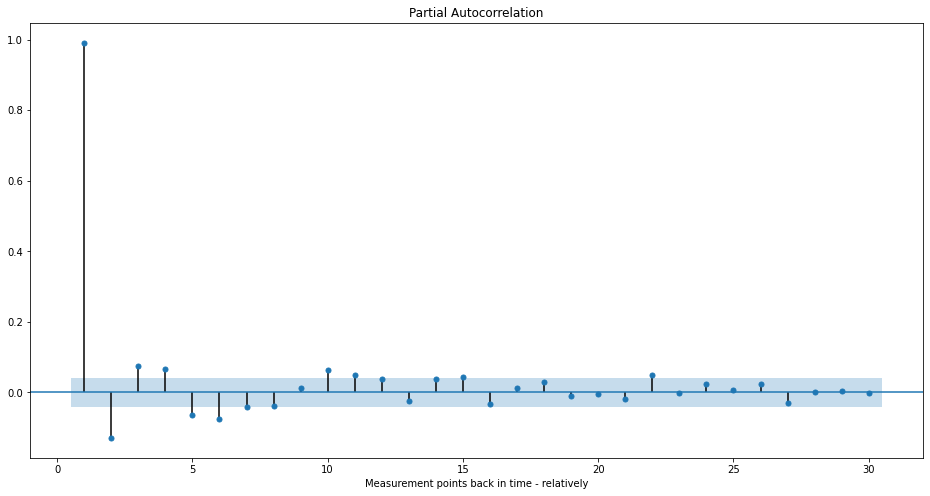

---


In [8]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig, ax = plt.subplots(figsize=(16,8))

plot_pacf(df["Close"].values, lags=30, zero=False, ax=ax)
plt.xlabel("Measurement points back in time - relatively")

plt.show()
print("---")

In [9]:
from sklearn.model_selection import train_test_split
# !!! shuffle = False !!!
train_data, test_data = train_test_split(df, test_size=0.1, shuffle=False)

### Feladat 4:

Illesszen egyszerű lineáris modellt az adatra, értékelje annak teljesítményét, vonja le a tanulságokat!

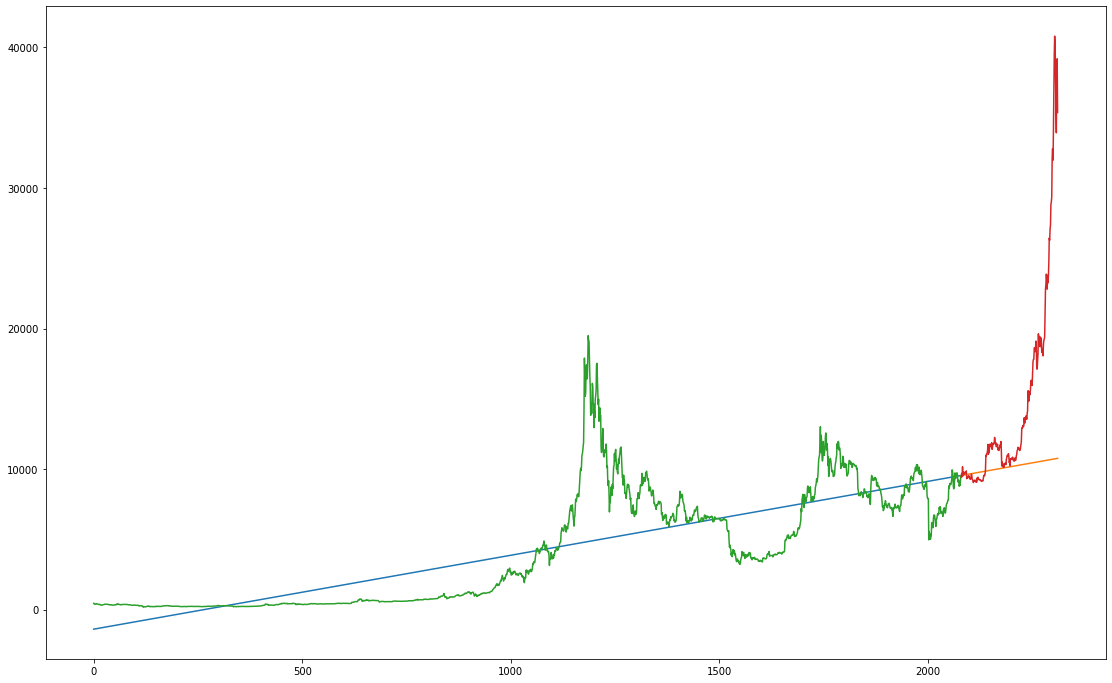

In [12]:
from sklearn.linear_model import LinearRegression

lin_model= LinearRegression()
lin_model.fit(train_data.index.astype("int64").values.reshape(-1, 1),train_data["Close"].values)#

train_fit = lin_model.predict(train_data.index.astype("int64").values.reshape(-1, 1))
train_fit = pd.Series(train_fit)
train_fit.index =train_data.index

prediction = lin_model.predict(test_data.index.astype("int64").values.reshape(-1, 1))
prediction = pd.Series(prediction)
prediction.index =test_data.index


fig, ax = plt.subplots(figsize=(19,12))
plt.plot(train_fit)
plt.plot(prediction)

plt.plot(train_data["Close"])

plt.plot(test_data["Close"])

plt.show()

### Feladat 5:

Használjon autoregresszív modellt az előrejelzésre, értékelje annak teljesítményét!

In [31]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

history = [x for x in list(train_data["Close"].values.astype("float"))]
predictions = list()

print("Előrejelzés az ARIMA-val:\n")

# Lépésről lépésre bejárjuk a tesztkészletet
# Igen, tesztkészlet. Ez minden egyes adatpontra online tanulási forgatókönyvként értelmezhető. 
for t in range(len(list(test_data["Close"].values.astype("float")))):
    # Modell inicializálása
    model = ARIMA(history, order=(5,1,1))
    # Kedves fejlesztők, légyszi csináljatok már egy bullshit mentes model.fit() megoldást Scikit-szerűen a stdoutre, 
    #hogy ne kelljen vesződni! Köszi! :-P 
    model_fit = model.fit(disp=0)
    # Egy időperiódus előrejelzése
    output = model_fit.forecast()
    # Összegyűjtés
    yhat = output[0]
    predictions.append(yhat)
    
    #Egy lépés előre az időben
    obs = list(test_data["Close"].values.astype("float"))[t]
    
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))



Előrejelzés az ARIMA-val:

predicted=9496.721475, expected=9439.124023
predicted=9453.465126, expected=9700.414063
predicted=9689.572197, expected=9461.058594
predicted=9477.602422, expected=10167.268555
predicted=10216.492873, expected=9529.803711
predicted=9491.723789, expected=9656.717773
predicted=9696.302928, expected=9800.636719
predicted=9766.201818, expected=9665.533203
predicted=9749.886245, expected=9653.679688
predicted=9581.928122, expected=9758.852539
predicted=9792.018577, expected=9771.489258
predicted=9783.688168, expected=9795.700195
predicted=9786.946845, expected=9870.094727
predicted=9875.067140, expected=9321.781250
predicted=9319.562144, expected=9480.843750
predicted=9492.809461, expected=9475.277344
predicted=9482.850609, expected=9386.788086
predicted=9408.738121, expected=9450.702148
predicted=9404.657717, expected=9538.024414
predicted=9569.992846, expected=9480.254883
predicted=9477.059289, expected=9411.840820
predicted=9406.611316, expected=9288.018555
pre


Mean abs error: 380.52549008228465
Explained variance: 0.9904998451994405


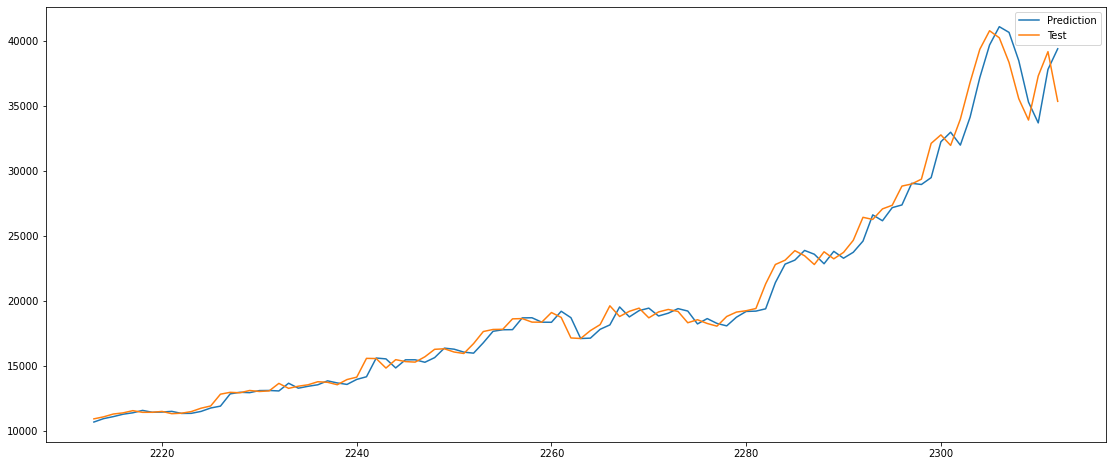

In [37]:
from sklearn.metrics import mean_absolute_error, explained_variance_score
# Készítsünk valamilyen hibaelemzést
    
errors = np.array(test_data["Close"].values)-np.array(predictions)

print()
print("Mean abs error:",mean_absolute_error(test_data["Close"].values,predictions))
print("Explained variance:",explained_variance_score(test_data["Close"].values,predictions))

predictions = pd.Series(predictions)
predictions.index =test_data.index    

fig, ax = plt.subplots(figsize=(19,8))
plt.plot(predictions[-100:], label="Prediction")

#plt.plot(train_data["Close"], label="Train")

plt.plot(test_data["Close"][-100:], label="Test")
plt.legend()
plt.show()

### Feladat 6:

Alkalmazzon tetszőleges összetettebb modellezési módszert, maximalizálja a prediktív teljesítményt!

### Feladat 7:

Válassza ki a legjobbnak ítélt modellezési módot, írja le esetleges előnyeit / hátrányait!

## Opcionális feladat: Napi modellezés

Kisérleje meg általánosítani a fenti eljárást a napi adatokon!